In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import matplotlib.cm as cm
import plotly.express as px
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D

## Chargement des données du catalogue avec CO2

In [2]:
catalogue = pd.read_csv("data/Catalogue_cleaned_local.csv", encoding='utf8')

In [3]:
catalogue.shape

(270, 12)

In [4]:
catalogue.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,bonus_malus,rejets_co2_gkm,cout_energie
0,Volvo,S80 T6,272,très longue,5,5,blanc,0,50500,-6000.0,42.0,72.0
1,Volvo,S80 T6,272,très longue,5,5,noir,0,50500,-6000.0,42.0,72.0
2,Volvo,S80 T6,272,très longue,5,5,rouge,0,50500,-6000.0,42.0,72.0
3,Volvo,S80 T6,272,très longue,5,5,gris,1,35350,-6000.0,42.0,72.0
4,Volvo,S80 T6,272,très longue,5,5,bleu,1,35350,-6000.0,42.0,72.0


In [5]:
catalogue.dtypes

marque             object
nom                object
puissance           int64
longueur           object
nbPlaces            int64
nbPortes            int64
couleur            object
occasion            int64
prix                int64
bonus_malus       float64
rejets_co2_gkm    float64
cout_energie      float64
dtype: object

In [6]:
catalogue.describe()

,puissance,nbPlaces,nbPortes,occasion,prix,bonus_malus,rejets_co2_gkm,cout_energie
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,157.592593,5.222222,4.814815,0.407407,26668.055556,-2648.185185,58.685185,289.907407
std,90.551289,0.629707,0.580798,0.492264,19050.121112,4871.531247,59.340184,214.495281
min,55.000000,5.000000,3.000000,0.000000,7500.000000,-6000.000000,0.000000,72.000000
25%,109.000000,5.000000,5.000000,0.000000,16029.000000,-6000.000000,15.000000,96.000000
50%,147.000000,5.000000,5.000000,0.000000,20597.500000,-6000.000000,26.000000,206.000000
75%,170.000000,5.000000,5.000000,1.000000,30000.000000,1387.000000,108.000000,457.000000
max,507.000000,7.000000,5.000000,1.000000,101300.000000,8237.000000,187.000000,749.000000


In [7]:
catalogue.describe(include=['O'])

,marque,nom,longueur,couleur
count,270,270,270,270
unique,21,32,4,5
top,Renault,S80 T6,longue,blanc
freq,40,10,90,54


## Analyse exploratoire

### Déctection des valeurs manquantes

In [8]:
catalogue.isnull().sum()

marque            0
nom               0
puissance         0
longueur          0
nbPlaces          0
nbPortes          0
couleur           0
occasion          0
prix              0
bonus_malus       0
rejets_co2_gkm    0
cout_energie      0
dtype: int64

**Il n'y a pas de valeur manquates**

### Visualisation d'exploration

#### Observation Générale

In [9]:
catalogue.nunique()

marque            21
nom               32
puissance         24
longueur           4
nbPlaces           2
nbPortes           2
couleur            5
occasion           2
prix              54
bonus_malus        4
rejets_co2_gkm    13
cout_energie      14
dtype: int64

Les données avec le moins de representation sont les suivantes :

- longueur
- nbPlaces
- nbPortes
- couleur
- occasion
- bonus_malus

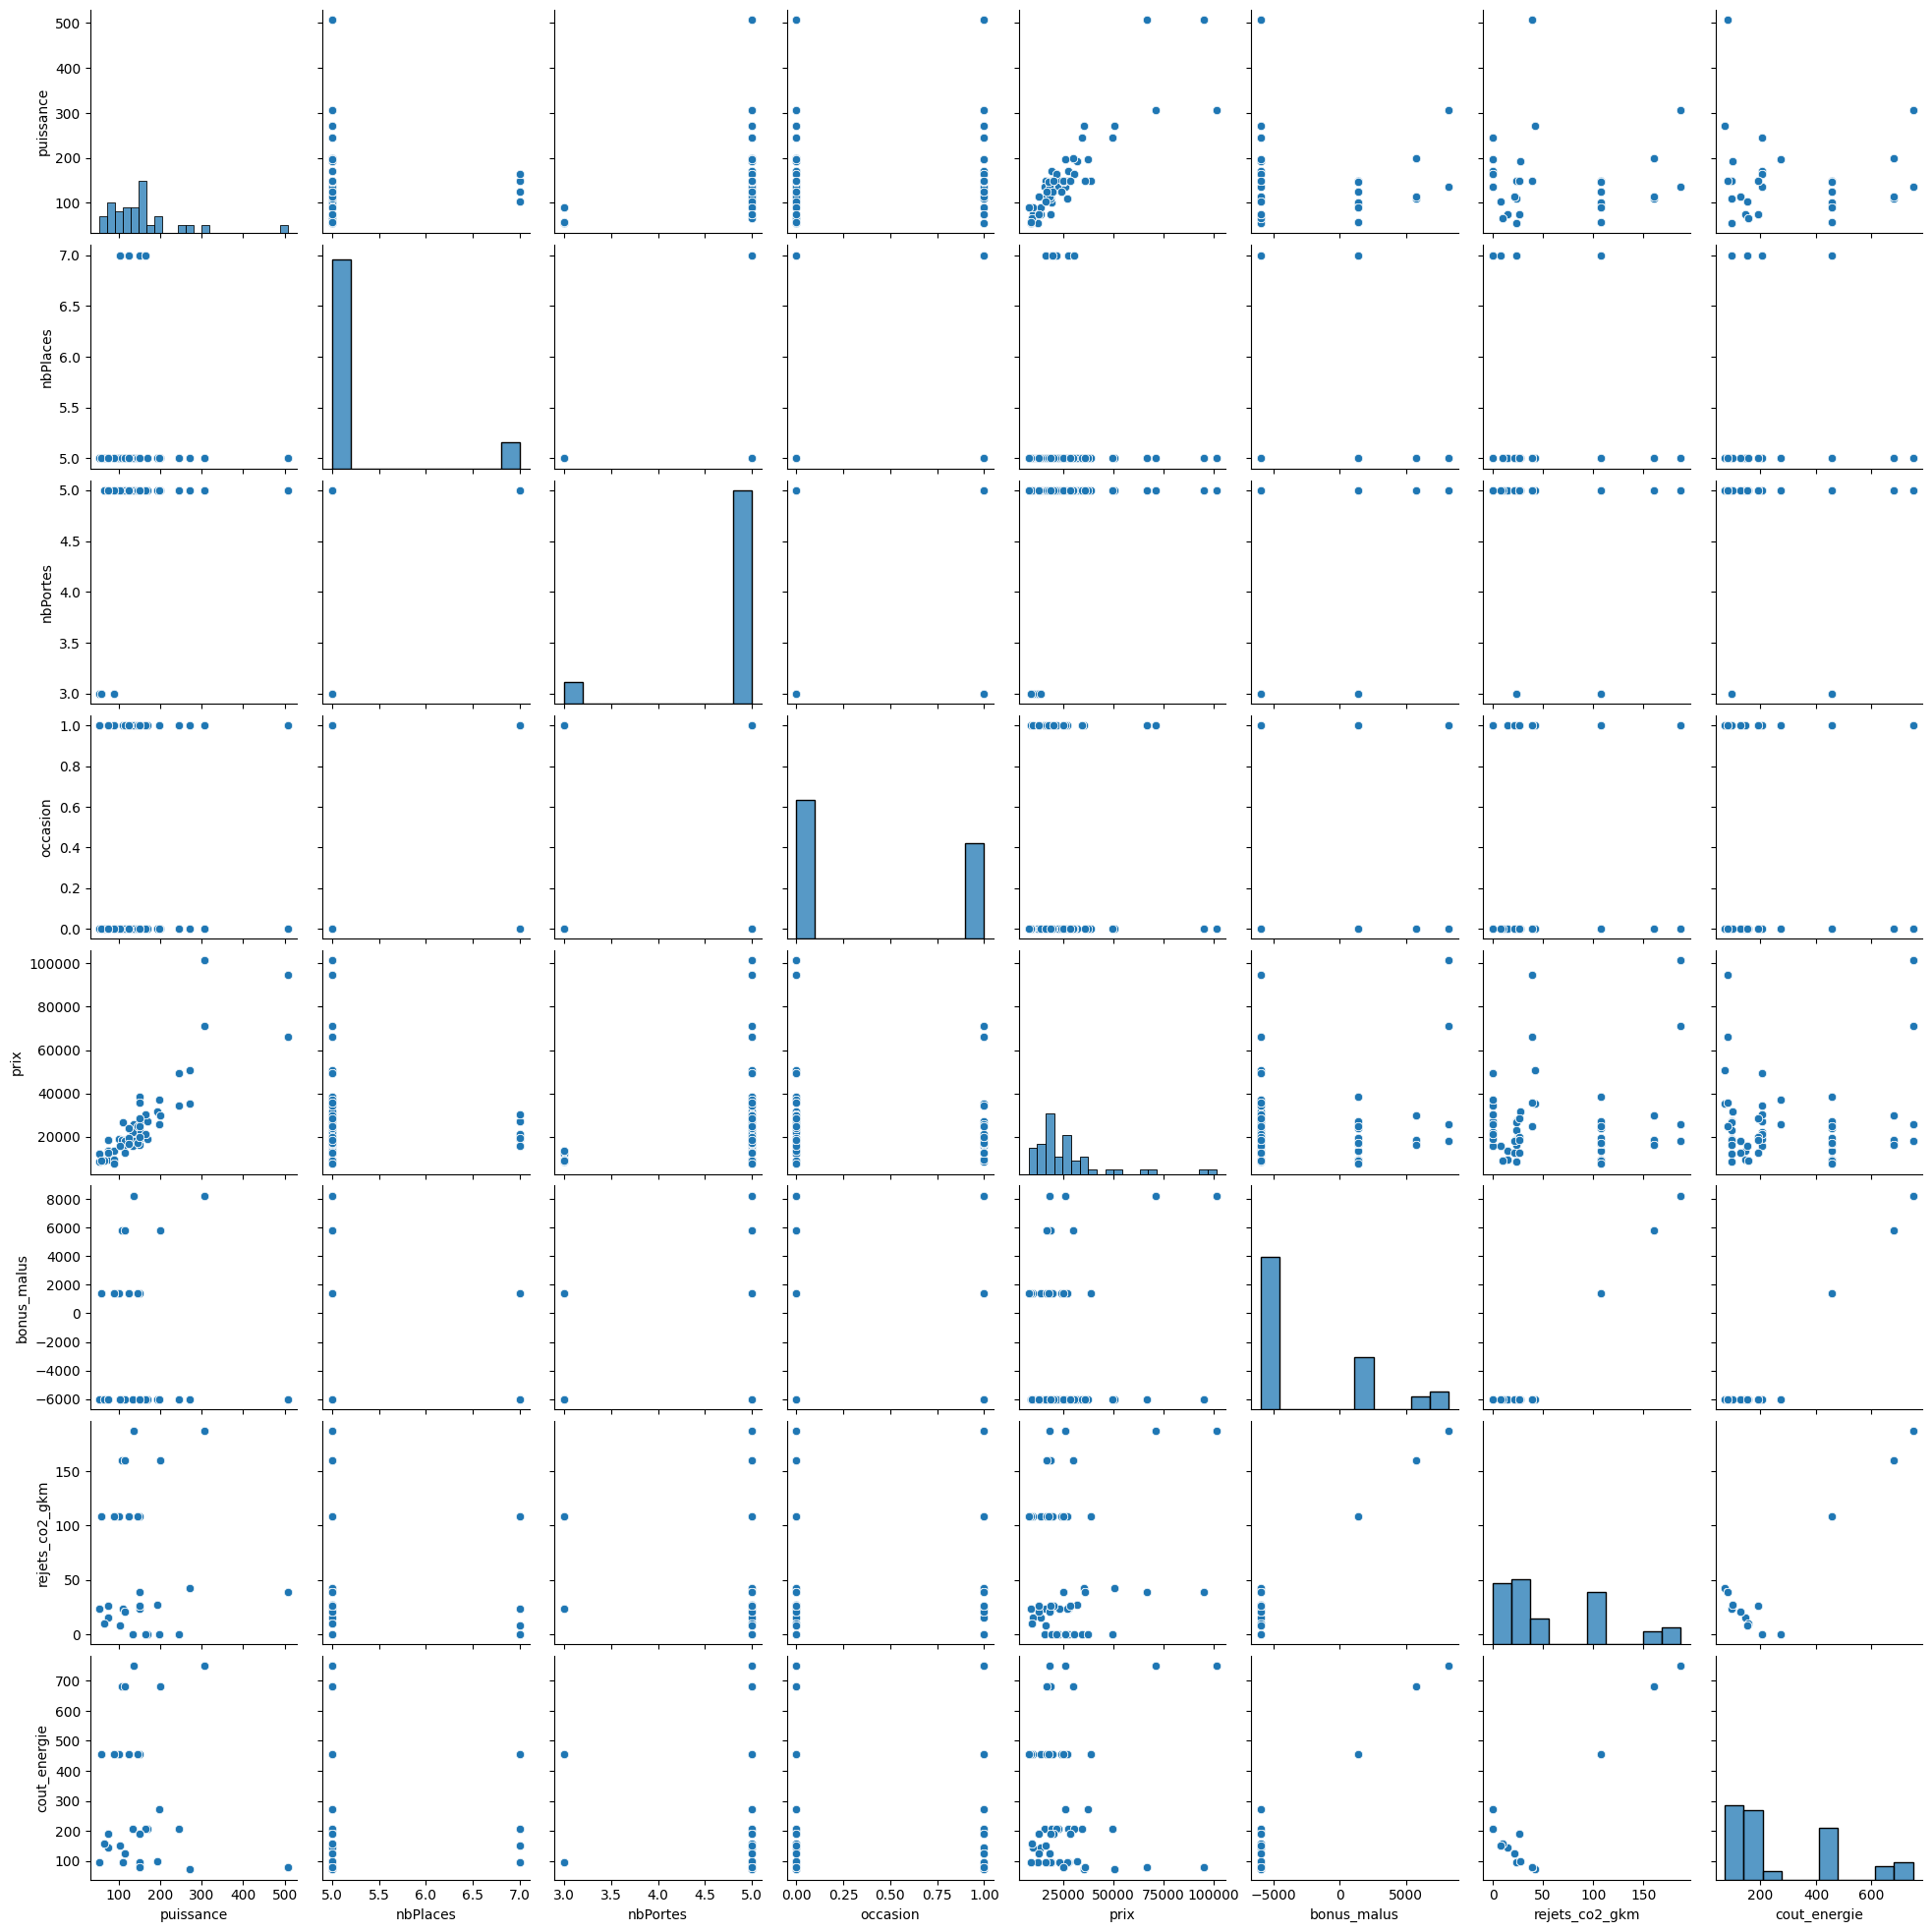

In [227]:
sns.pairplot(catalogue)

On remarque que :

- Le prix et la puissance sont corrélés
- Le rejet, le bonus_malus et cout semblent avoir des relations particulières
- Les variables prix et puissances semblent présenter une distribution asymétrique avec bias positif

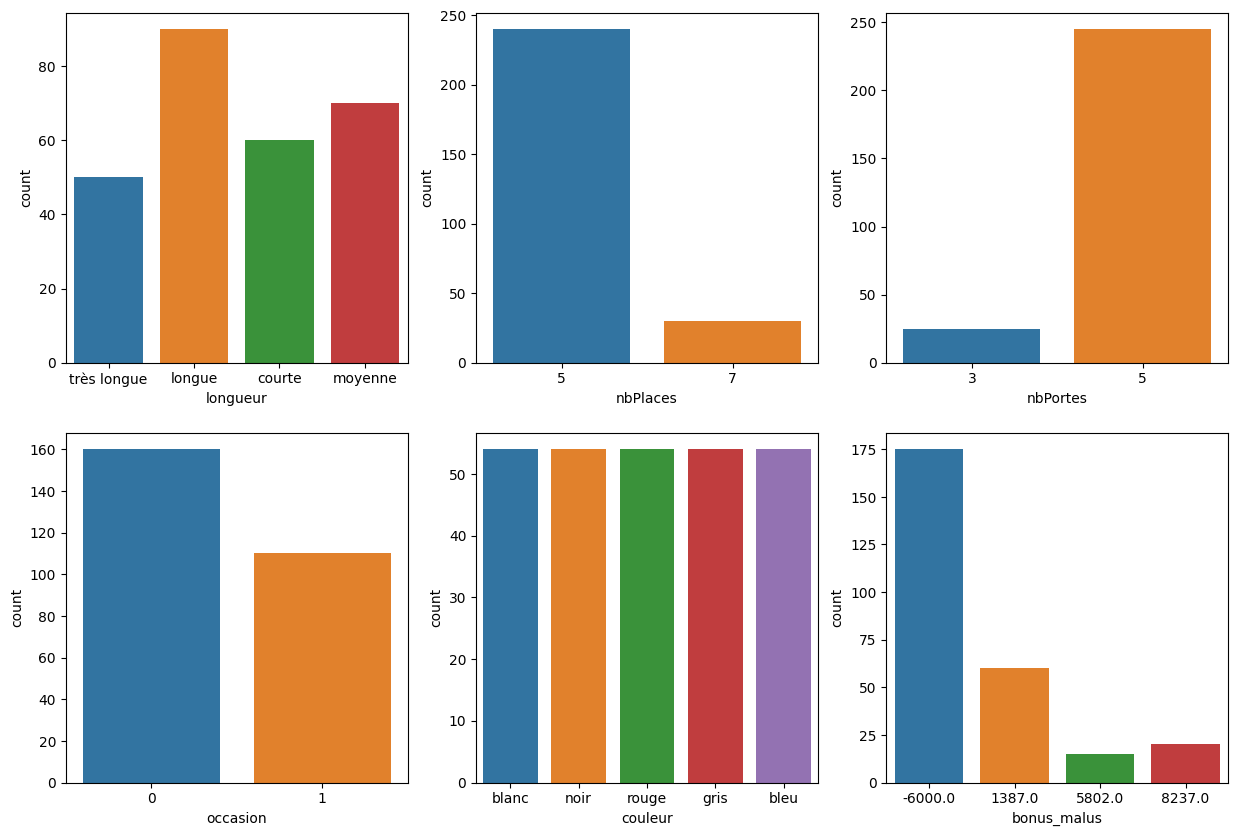

In [12]:
_, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15, 10))
sns.countplot(data=catalogue,x="longueur",ax=axs[0,0])
sns.countplot(data=catalogue,x="nbPlaces",ax=axs[0,1])
sns.countplot(data=catalogue,x="nbPortes",ax=axs[0,2])
sns.countplot(data=catalogue,x="occasion",ax=axs[1,0])
sns.countplot(data=catalogue,x="couleur",ax=axs[1,1])
sns.countplot(data=catalogue,x="bonus_malus",ax=axs[1,2])
plt.show()

#### Distributions du prix, puissance et bonus_malus

##### **Prix**

Text(0.5, 1.0, 'Distribution du prix')

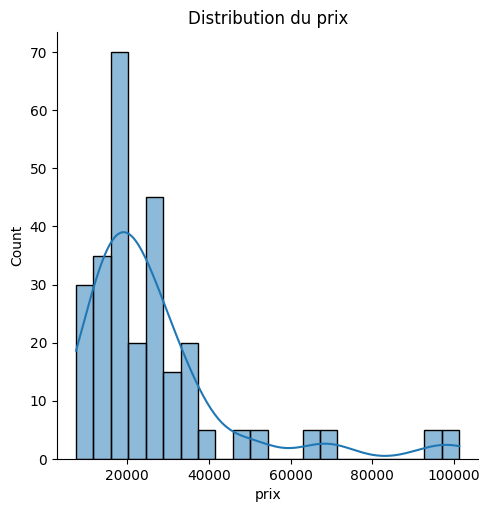

In [14]:
sns.displot(catalogue,x="prix",kde=True)
plt.title("Distribution du prix")

La distribution présente un bias positif. Essyons de retirer en enlever les valeurs aberantes

La valeur aberrante minimale est de 49200.0 avec un quantile 0.905
Il y'a 30 vehicules concernés


Text(0.5, 1.0, 'Boxplot sur le prix sans valeurs aberrantes prix < quantile(0.905) ')

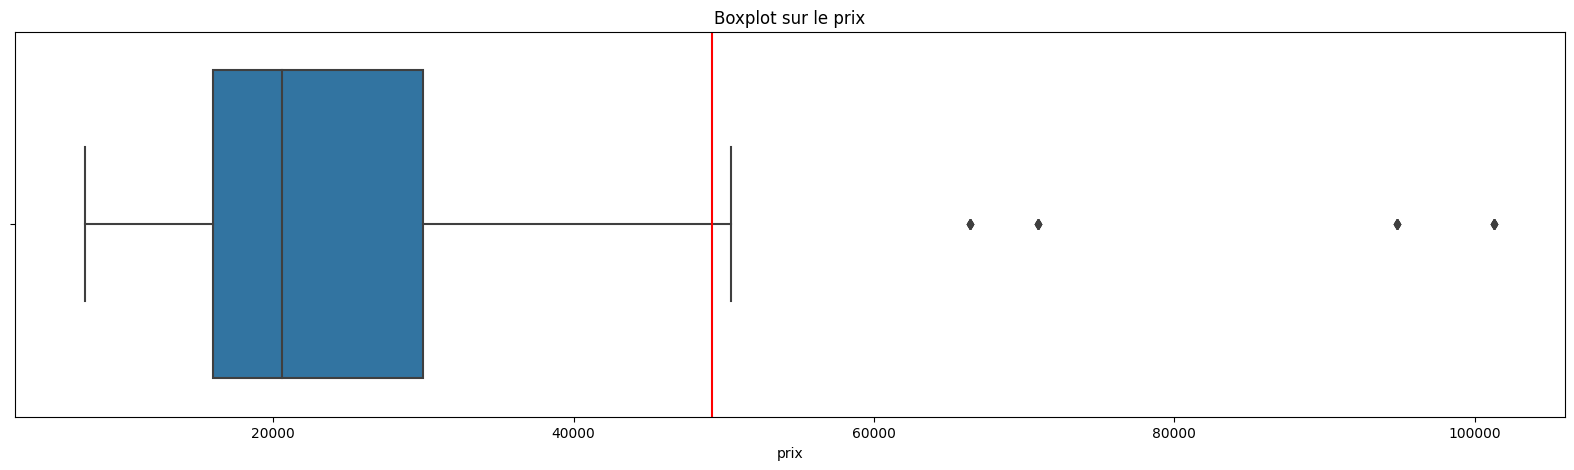

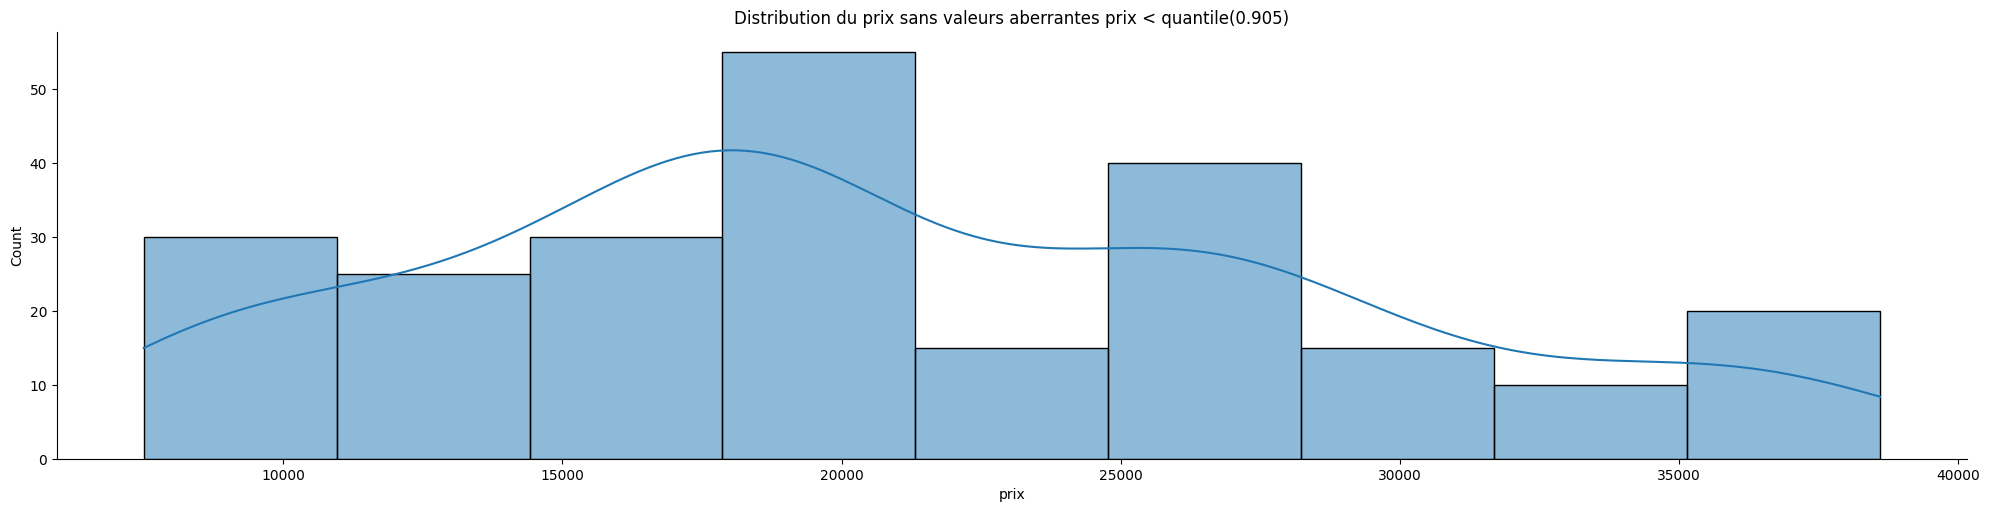

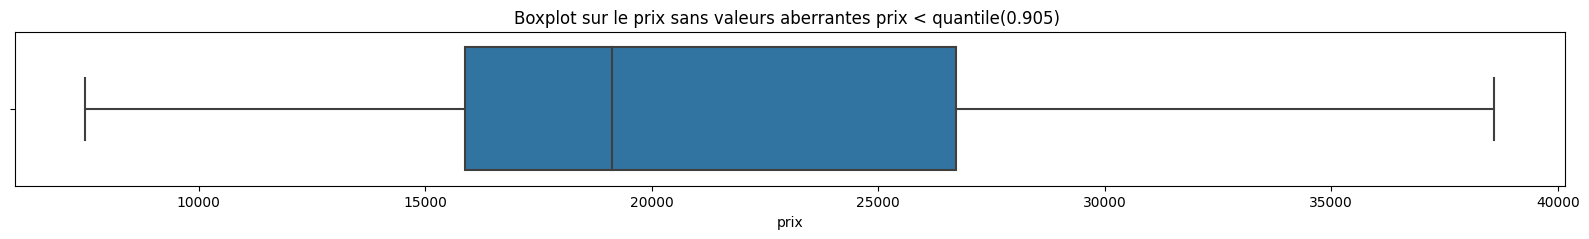

In [54]:
# Recherche de la valeur aberrante minimale par le quantile
q1 = 0.905
val1 = catalogue.prix.quantile(q1)
x = catalogue[catalogue.prix >= catalogue.prix.quantile(q1)].shape[0]
print(f"La valeur aberrante minimale est de {val1} avec un quantile {q1}")
print(f"Il y'a {x} vehicules concernés")
plt.figure(figsize=(20,5))
sns.boxplot(catalogue,x="prix")
plt.axvline(x=val1,color='red')
plt.title("Boxplot sur le prix")

# Affichage de catalogue sans les valeurs aberrante
sns.displot(catalogue[catalogue.prix < catalogue.prix.quantile(q1)],x="prix",aspect=4,kde=True)
plt.title(f"Distribution du prix sans valeurs aberrantes prix < quantile({q1})")
plt.figure(figsize=(20,2))
sns.boxplot(catalogue[catalogue.prix < catalogue.prix.quantile(q1)],x="prix")
plt.title(f"Boxplot sur le prix sans valeurs aberrantes prix < quantile({q1}) ")

En retirant les valeur aberrantes ont obtient une distribution sans bias positif. On peut donc accepter cette distribution

Calculons le log sur le prix sans les valeurs aberrantes

Text(0.5, 1.0, 'Distribution avec log_prix')

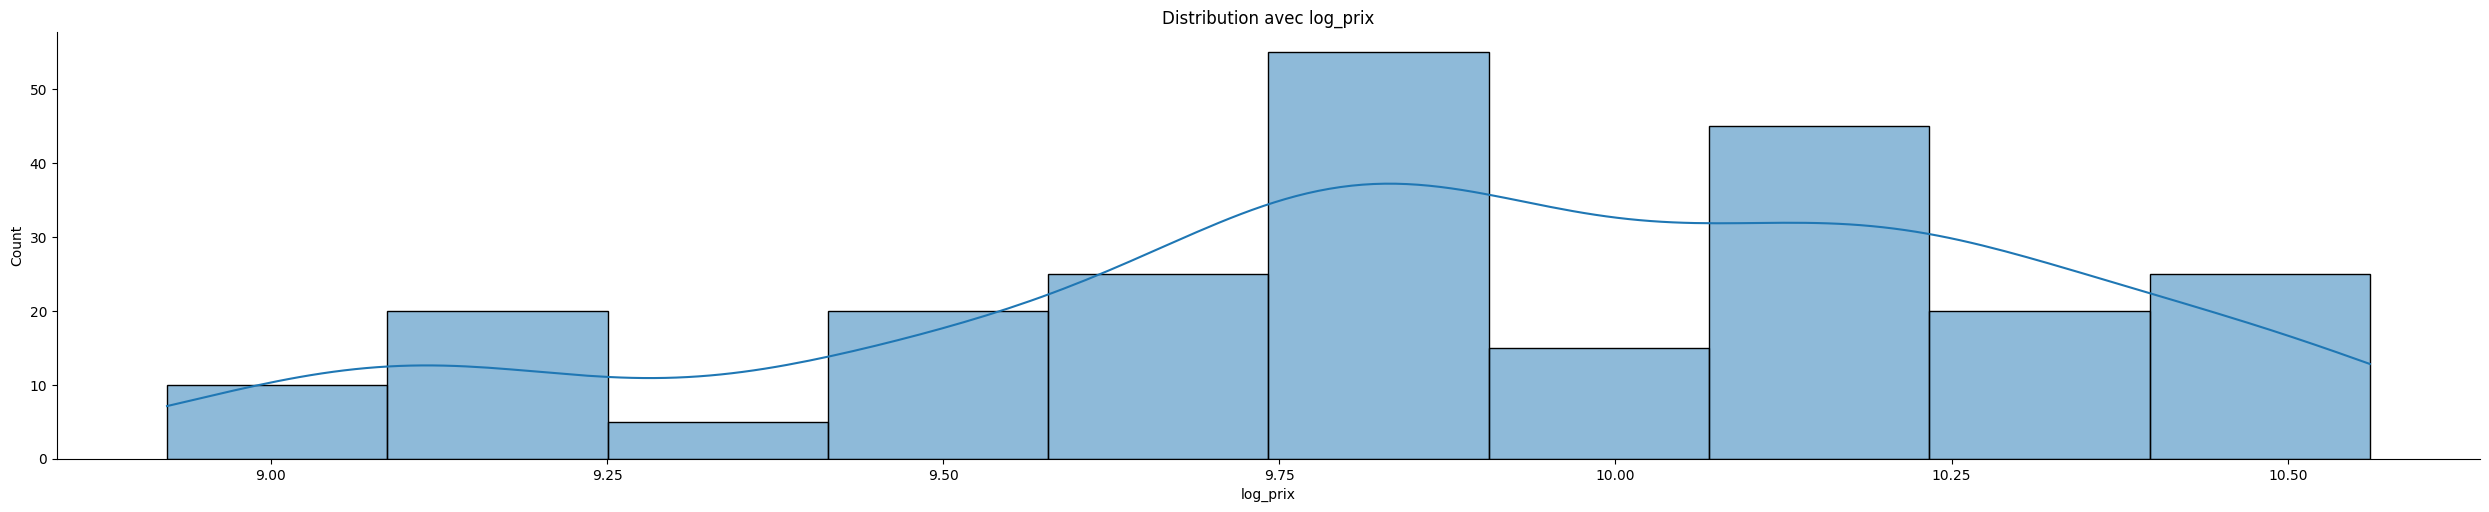

In [234]:
tmp = catalogue.copy()
tmp = tmp[tmp.prix < tmp.prix.quantile(q1)]
tmp["log_prix"]=np.log1p(tmp.prix)

sns.displot(tmp,x="log_prix",aspect=5,kde=True)
plt.title("Distribution avec log_prix")

##### **Puissance**

On effectue le même processus que précédemment

Text(0.5, 1.0, 'Distribution du puissance')

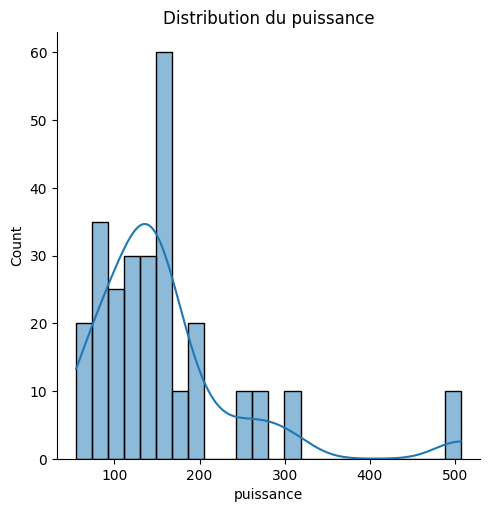

In [30]:
sns.displot(catalogue,x="puissance",kde=True)
plt.title("Distribution du puissance")

Text(0.5, 1.0, 'Distribution du puissance')

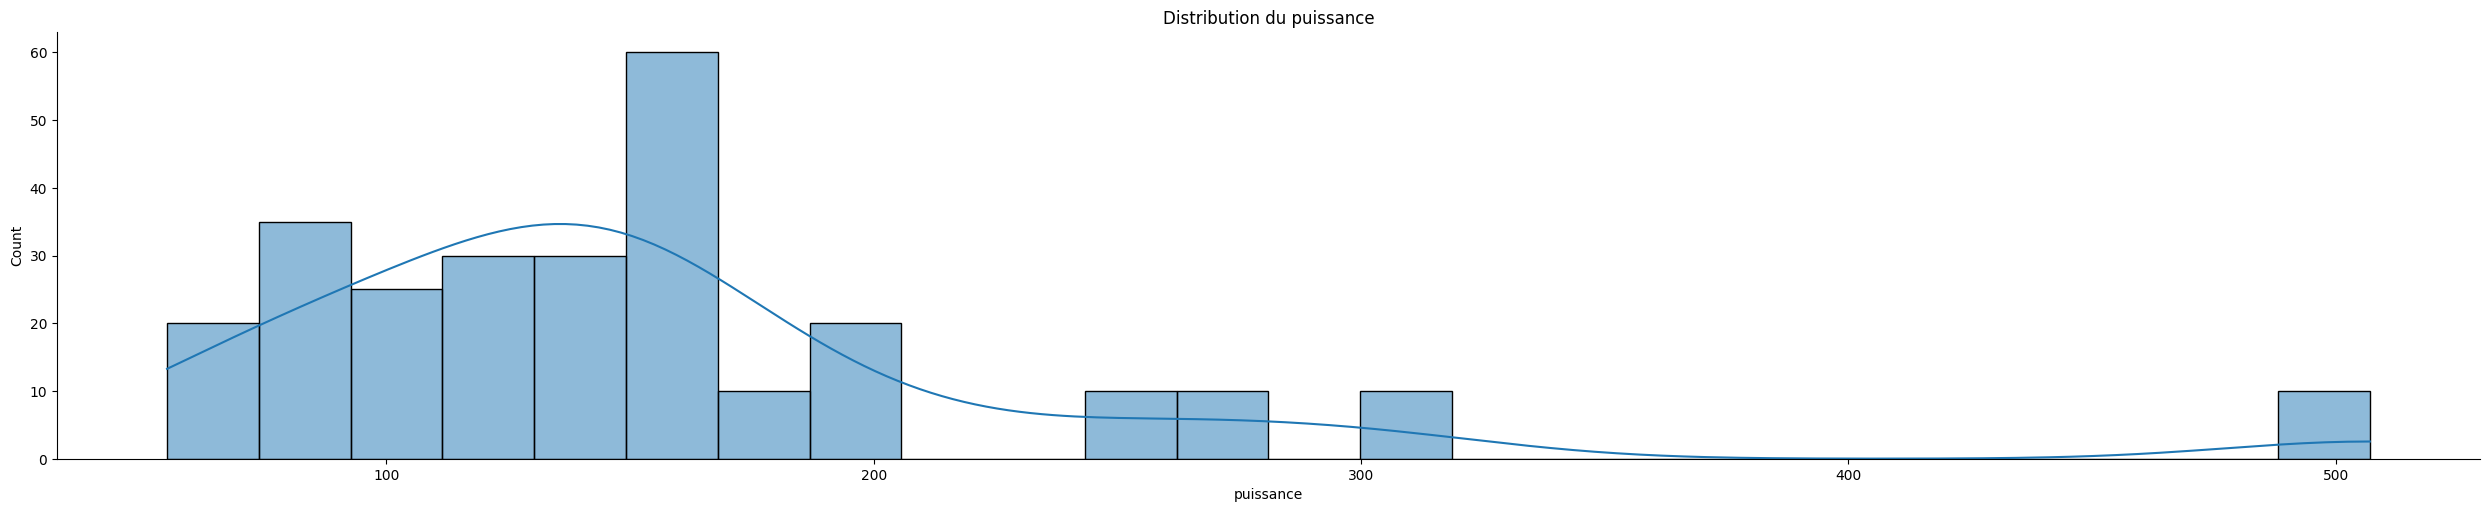

In [235]:
sns.displot(catalogue,x="puissance",aspect=5,kde=True)
plt.title("Distribution du puissance")

Il y'a aussi des valeurs abérrantes et la distribution est asymétrique avec biais positif

La valeur aberrante minimale est de 272.0 avec un quantile 0.905
Il y'a 30 vehicules concernés


Text(0.5, 1.0, 'Boxplot sur le puissance sans valeurs aberrantes puissance < quantile(0.905) ')

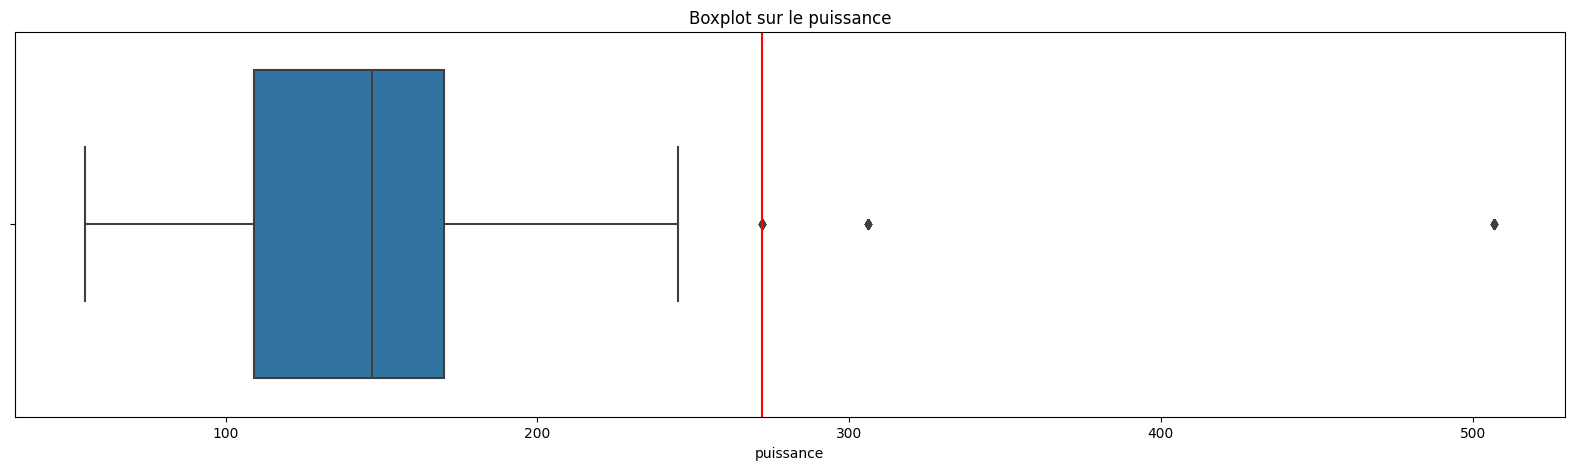

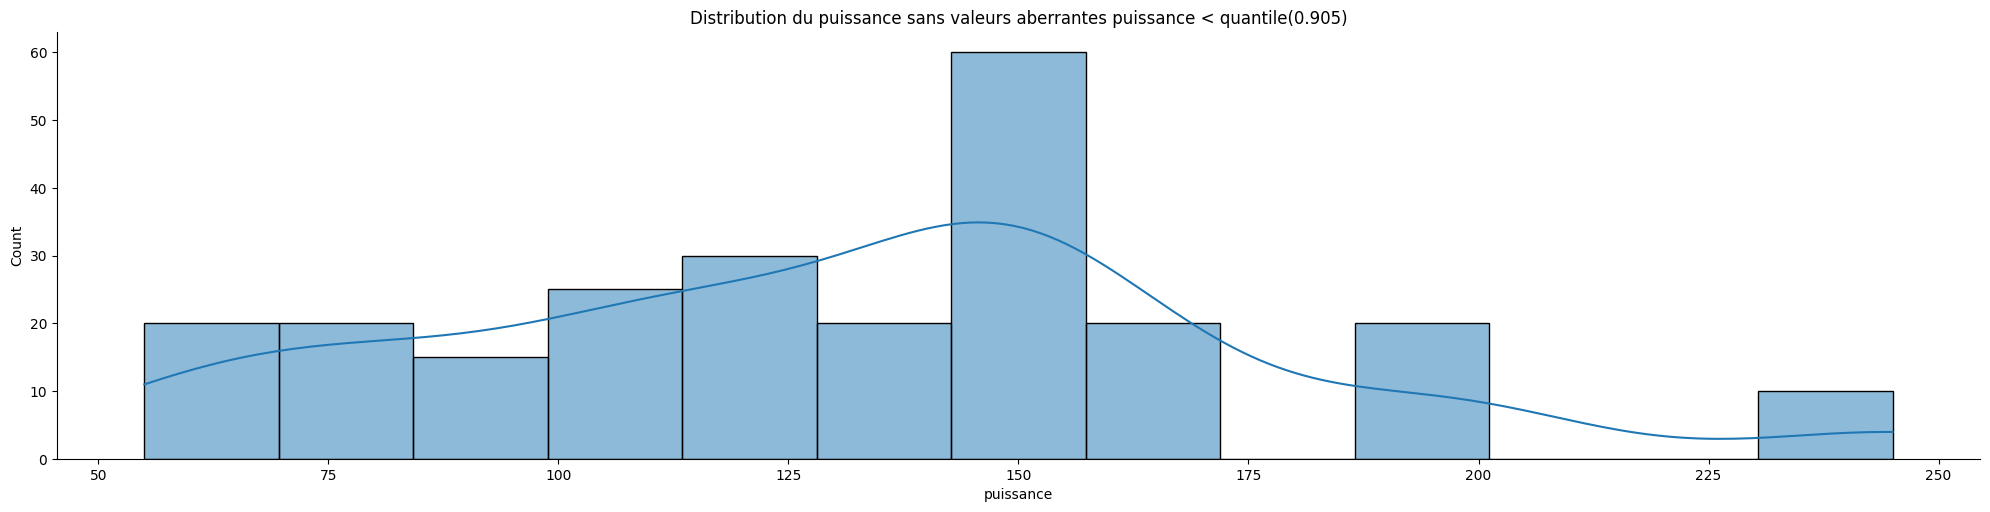

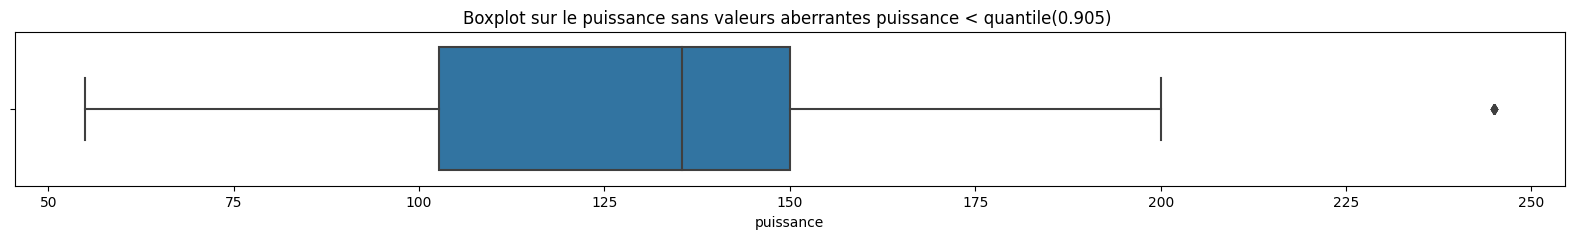

In [52]:
# Recherche de la valeur aberrante minimale par le quantile
q2 = 0.905
val2 = catalogue.puissance.quantile(q2)
x = catalogue[catalogue.puissance >= catalogue.puissance.quantile(q2)].shape[0]
print(f"La valeur aberrante minimale est de {val2} avec un quantile {q2}")
print(f"Il y'a {x} vehicules concernés")
plt.figure(figsize=(20,5))
sns.boxplot(catalogue,x="puissance")
plt.axvline(x=val2,color='red')
plt.title("Boxplot sur le puissance")

# Affichage de catalogue sans les valeurs aberrante
sns.displot(catalogue[catalogue.puissance < catalogue.puissance.quantile(q2)],x="puissance",aspect=4,kde=True)
plt.title(f"Distribution du puissance sans valeurs aberrantes puissance < quantile({q2})")
plt.figure(figsize=(20,2))
sns.boxplot(catalogue[catalogue.puissance < catalogue.puissance.quantile(q2)],x="puissance")
plt.title(f"Boxplot sur le puissance sans valeurs aberrantes puissance < quantile({q2}) ")

En retirant les valeur aberrantes ont obtient une distribution sans bias positif. On peut donc accepter cette distribution

Calcul du log de la puissance

Text(0.5, 1.0, 'Distribution avec log_puissance')

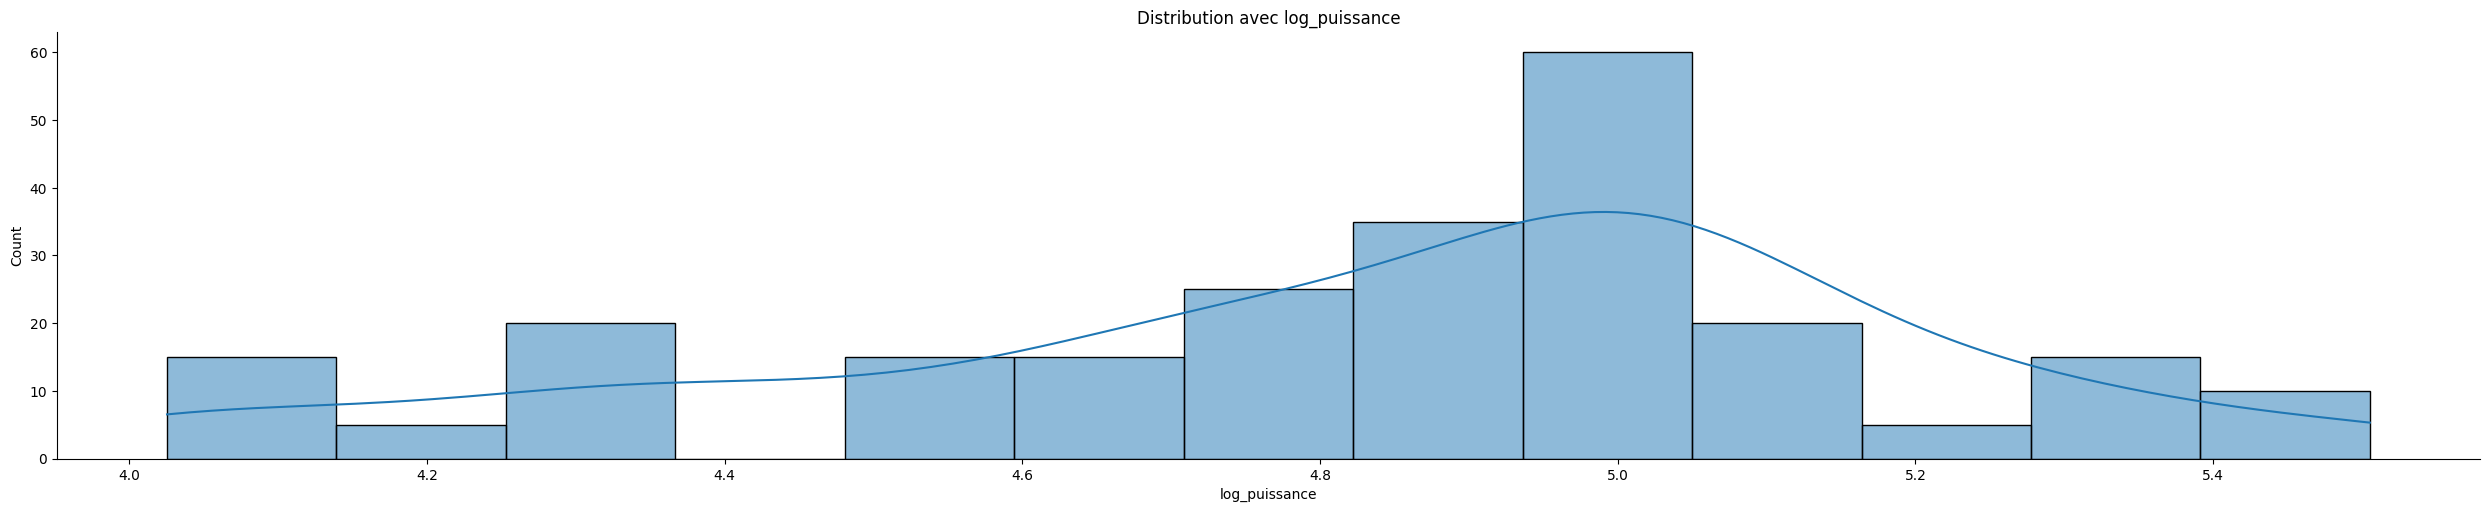

In [53]:
tmp = catalogue.copy()
tmp = tmp[tmp.puissance < tmp.puissance.quantile(q2)]
tmp["log_puissance"]=np.log1p(tmp.puissance)

sns.displot(tmp,x="log_puissance",aspect=5,kde=True)
plt.title("Distribution avec log_puissance")

La densité est mieux repartie avec le log

On peut se permettre de laisser la distribution tel quel

Observons le log

#### **Conclusions**

Les variables catégorielles sont les suivantes :

- nom
- marque
- longueur (coutre,longue,moyenne)
- nbPlaces (3,5,7)
- nbPortes (3,5)
- couleur  (rouge,gris,blanc,noir,bleu)
- bonus_malus (-6000,  1387,  5802,  8237)

Les variables continues sont les suivantes :

- puissance
- prix
- bonus_malus
- rejets_co2_gkm
- cout_energie


Ils possible de regrouper les groupes de variables :
 
- Apparence
    - couleur
- Identification de vehicule
    - nom
    - marque
- Taille et spatialité
    - longueur
    - nbPlaces
    - nbPortes
- Côut et performance
    - prix
    - puissance
- Emission CO2
    - bonus_malus
    - rejets_co2_gkm
    - cout_energie

Globalement :
*   Plus la puissance d'un véhicule est élevée plus sont prix l'est aussi
*   La majorité des véhicules ont 5 places et 5 portes #
*   Les vehicules long sont les plus nombreux #
*   La longueur des véhicules est bien repartie avec la dominance des longs véhicules #
*   Pour retirer les valeurs abérrantes de la puissance et du prix il faut selectionner les lignes dont ces valeurs suivent cette règles : prix/puissance < quantile(0.905)
*   La supression des valeurs aberrantes entrainnent une perte de 30 vehicules

Dans la suite nous allons nous concentrer sur les variables qui concerne les caractéristiques des vehicules.
Donc nous retirons les colonnes nom, marque, couleur pour l'analyse exploratoire.

### Relation entre les variables

Avant de continuer on va appliquer appliqué un log sur les colonnes de puissance et prix et retirer les valeurs aberrantes par le quantile débuit lors l'observation des données

In [55]:
quantile = q1
quantile

0.905

In [59]:
catalogue2 = catalogue.copy()
catalogue2 = catalogue2[(catalogue2.prix < catalogue2.prix.quantile(quantile))]
catalogue2["log_prix"]=np.log1p(catalogue2.prix)
catalogue2["log_puissance"]=np.log1p(catalogue2.puissance)

#### Puissance - prix - longueur

Voici notre référentiel de puissance :

- Très faible puissance : moins de 50
- Faible puissance : de 50 à 99
- Puissance moyenne : de 100 à 149
- Puissance élevée : de 150 à 199
- Très puissante : plus de 200

Voici notre référentiel de prix :
- Très bon marché : moins de 10 000
- Bon marché : de 10 000 à 20 000
- Prix moyen : de 20 000 à 30 000
- Cher : de 30 000 à 50 000
- Très cher : plus de 50 000

Text(0.5, 1.0, 'Joint Plot de la puissance et le prix')

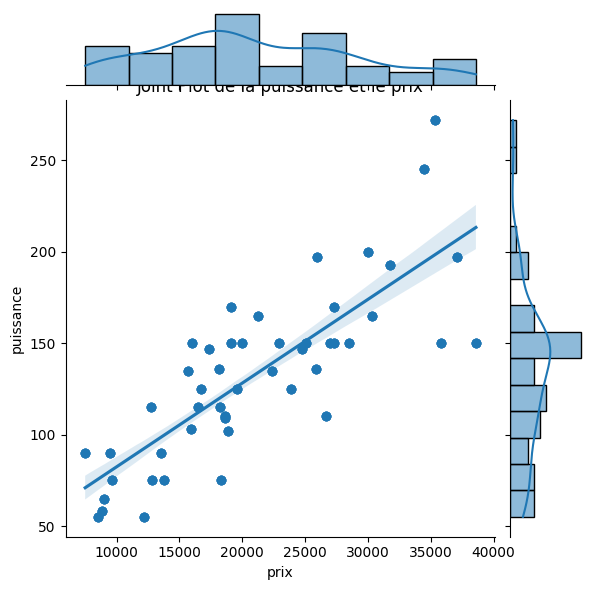

In [60]:
sns.jointplot(catalogue2,x="prix",y="puissance",kind="reg")
plt.title("Joint Plot de la puissance et le prix")

On remarque que : plus le vehicule est chère plus sa puissance est évelée. Mais ce n'est pas toujours vrai car certains véhicules sont chère mais possèdent une puissance plus modrée. Cela est certainement dû à certaines de leur caractéristiques. **Donc on peut avoir des véhicules chères, puissant mais modéré**.

Text(0.5, 1.0, 'Joint Plot de la puissance et le prix')

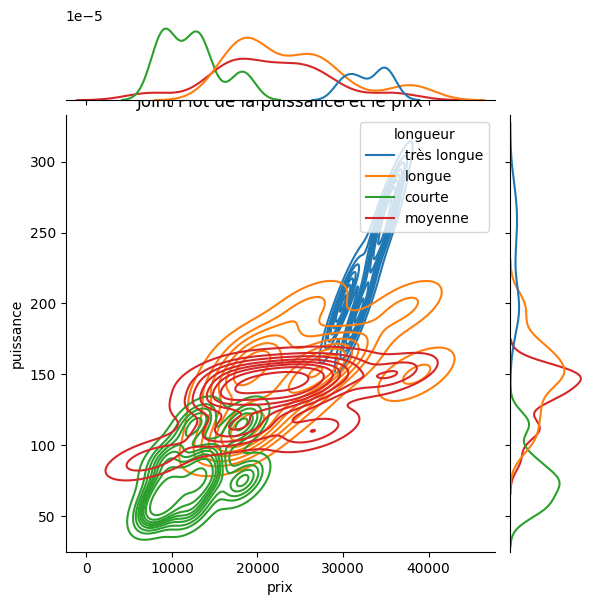

In [61]:
sns.jointplot(catalogue2,x="prix",y="puissance",hue='longueur',kind="kde")
plt.title("Joint Plot de la puissance et le prix")

Remarques concernant la longueur et le prix :
- Les vehicules courts ont des prix qui varient entre ]10000,30000]
- Les vehicule longs ont des prix qui varient entre [10000,50000[
- Les vehicule moyens ont des prix qui varient entre ]10000,50000]
- Les vehicule très longs [20000,50000]

Remarques concernant la longueur et la puissance:
- Les vehicules courts ont une puissance allant jusqu'à la moyenne [50,149]
- Les vehicule longs ont une puissance qui peu atteindre le stade de puissance évelée - [50,160]
- Les vehicule moyens ont une puissanec qui va de la moyenne au stade de très puissante ]100,200[
- Les vehicule très longs ont une puissance au minimum évelée ]150,200[

Ainsi :
- Le prix et la puissance suivent ont toujours la même dynanimqie
- On aura pas de voitures courtes, chères et très puissantes
- On aura pas de voitures longues, bon marché, faible ou très puissantes
- On aura pas de voitures moyennes, très chère et très puissante
- On aura pas de voitures très longues ayant un prix et une puissance inférieur à la moyenne

#### longueur - nbPlaces - nbPortes

Text(0.5, 1.0, 'Joint Plot de la puissance et le prix')

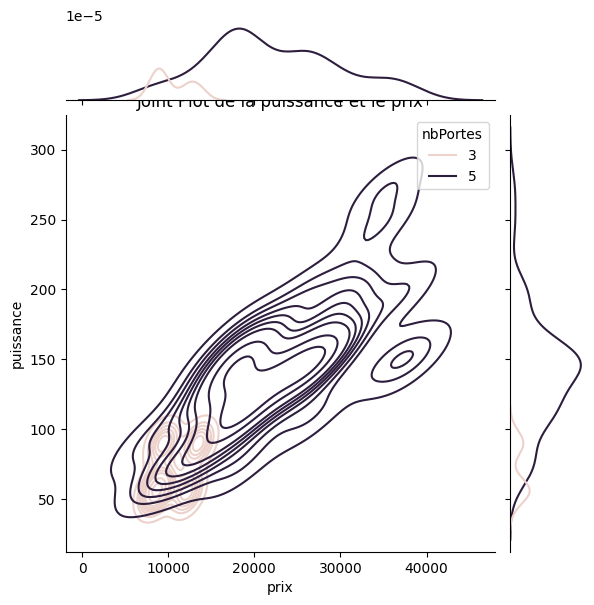

In [341]:
sns.jointplot(catalogue2,x="prix",y="puissance",hue='nbPortes',kind="kde")
plt.title("Joint Plot de la puissance et le prix")

Text(0.5, 1.0, 'Relplot de la relation entre la longueur et nbPlaces et nbPortes')

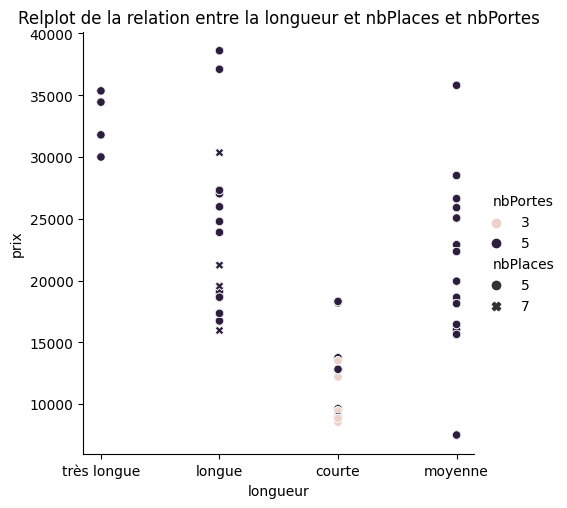

In [343]:
sns.relplot(catalogue2,x="longueur",y="prix",hue="nbPortes",style="nbPlaces")
plt.title("Relplot de la relation entre la longueur et nbPlaces et nbPortes")

**Remarques :**

Il n'y a que les voitures courtes qui peuvent avoir 3 portes. Par conséquent, le nombre de portes ne permet pas de nuancer la spatialité puisque la voiture est déjà courte. Les autres sont plus grand et ont tous 5 portes donc aucune nuance sera faites entre la voiture courte à 5 portes et celles moyenne au moins à 5 porte. 


Par contre au niveau du nombre de places on constate que seul les voitures longues sont concernées or les voitures très longues pourrais aussi avoir 7 places. Donc on considère que les voitures très longues peuvent être de 7 places. Cette nuance permet de distingué les vehicules sur la spatialité et permet de séparer les vehicules avec le plus d'espaces avec ceux qui on en mois étant donné qu'il existe une inclusion mutelle entre les véhicules de très longs et longs en à l'exceptionnel les moyennes.

#### Puissance - Prix - occasion

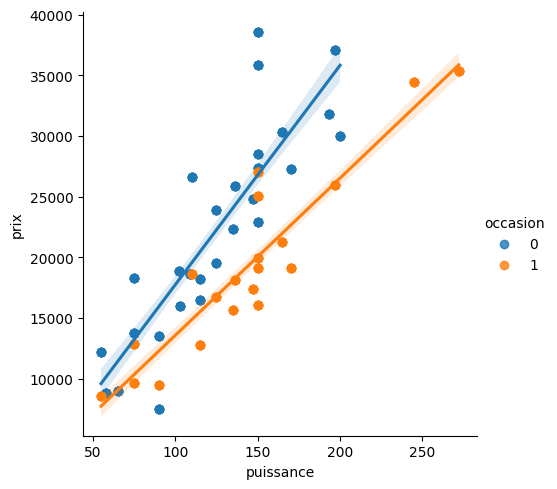

In [378]:
sns.lmplot(catalogue2,x="puissance",y="prix",hue="occasion")

On remarque les véhicules les plus chères sont le plus souvent neufs tandis que les plus puissants sont d'occasion, en majorité. Par conséquant on pourra créer une nuance autour du prix ou de la puissance

#### Emission carbone

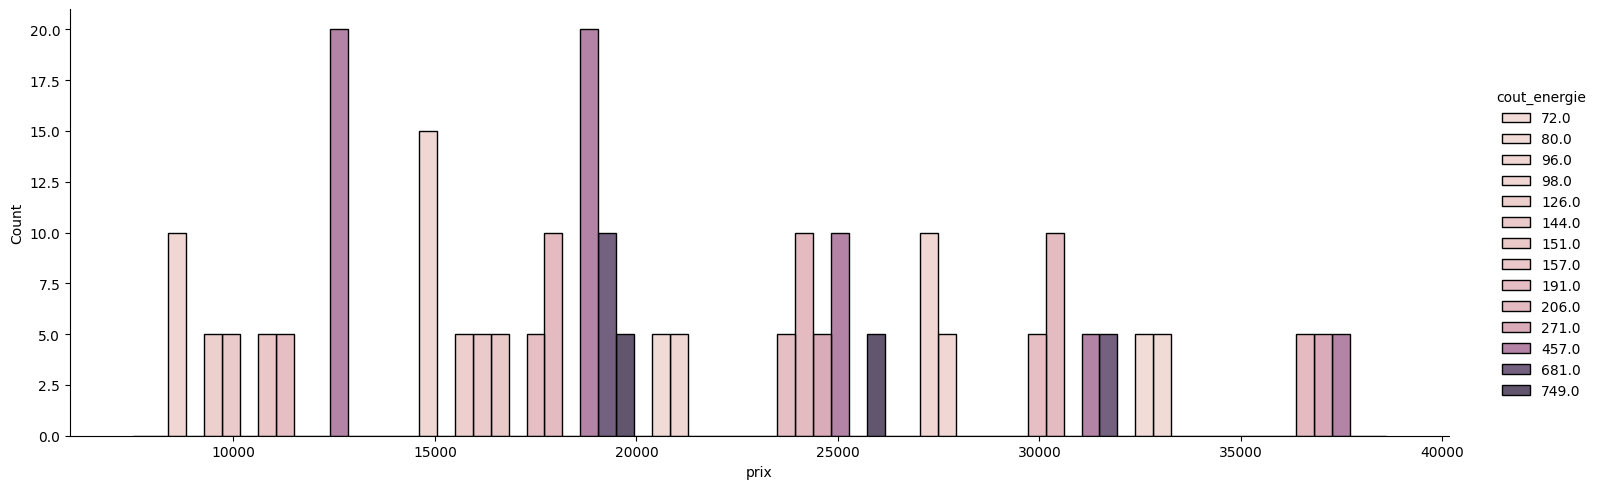

In [428]:
sns.displot(catalogue2,x="prix",bins=5,hue="cout_energie",multiple="dodge",aspect=3)

<Axes: xlabel='prix', ylabel='cout_energie'>

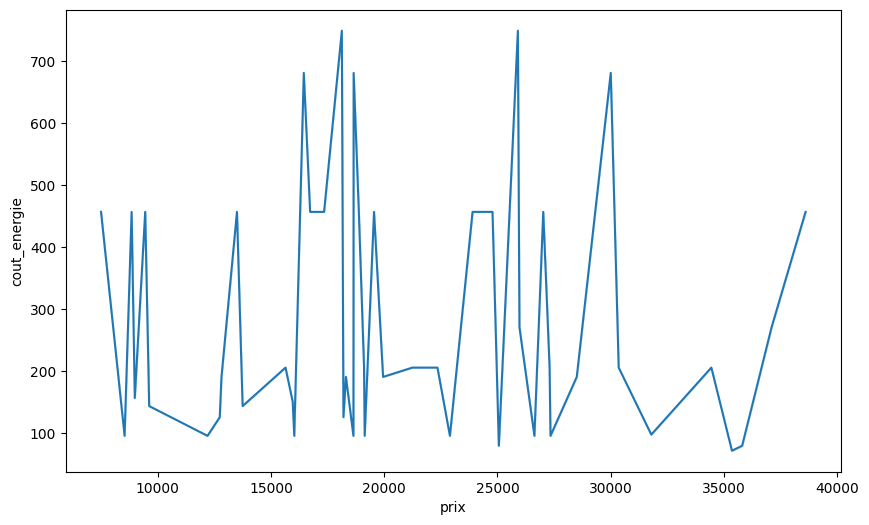

In [64]:
plt.figure(figsize=(10,6))
sns.lineplot(catalogue2,x="prix",y="cout_energie")

<Axes: xlabel='puissance', ylabel='rejets_co2_gkm'>

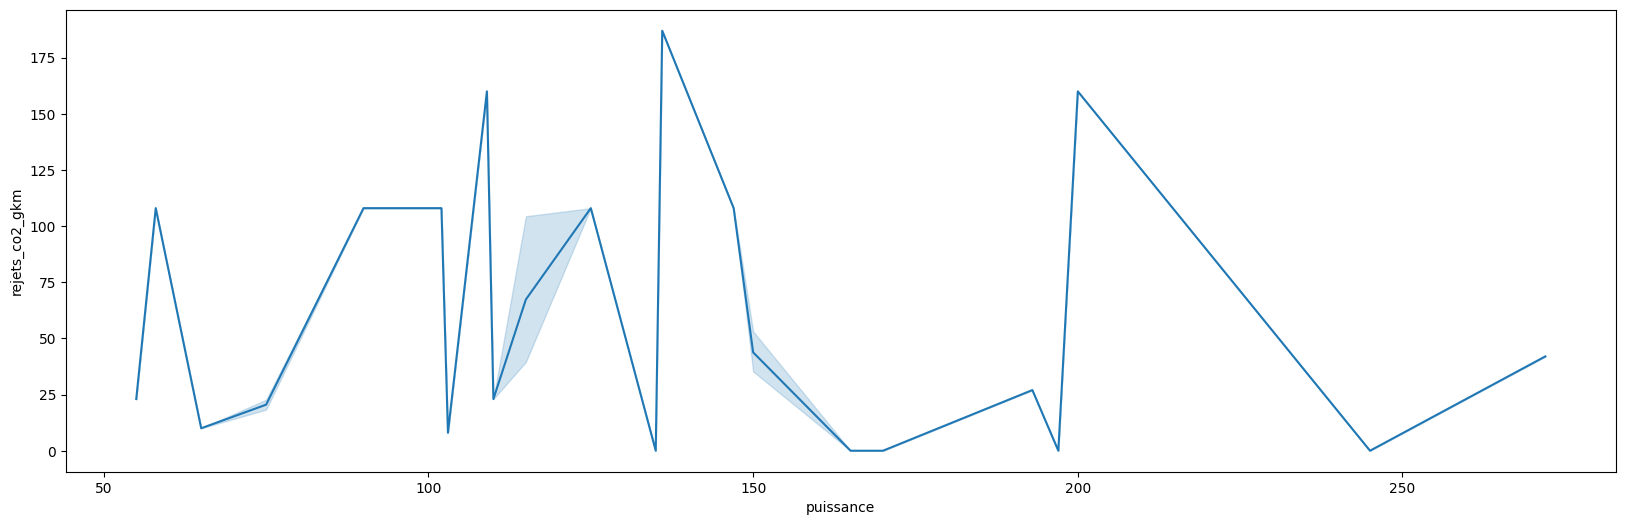

In [450]:
plt.figure(figsize=(20,6))
sns.lineplot(catalogue2,x="puissance",y="rejets_co2_gkm")

D'après les précendents schéma, nous pouvons que les information de CO2 ne permettent pas de caractériser les véhicules. Elle semble introduire du bruit.

#### Corrélation

In [66]:
longueur_encoded = catalogue2.longueur.map({"courte":1,"moyenne":2,"longue":3,"très longue":4,})
d = catalogue2.copy()
d["longueur"] = longueur_encoded.astype(int)

<Axes: >

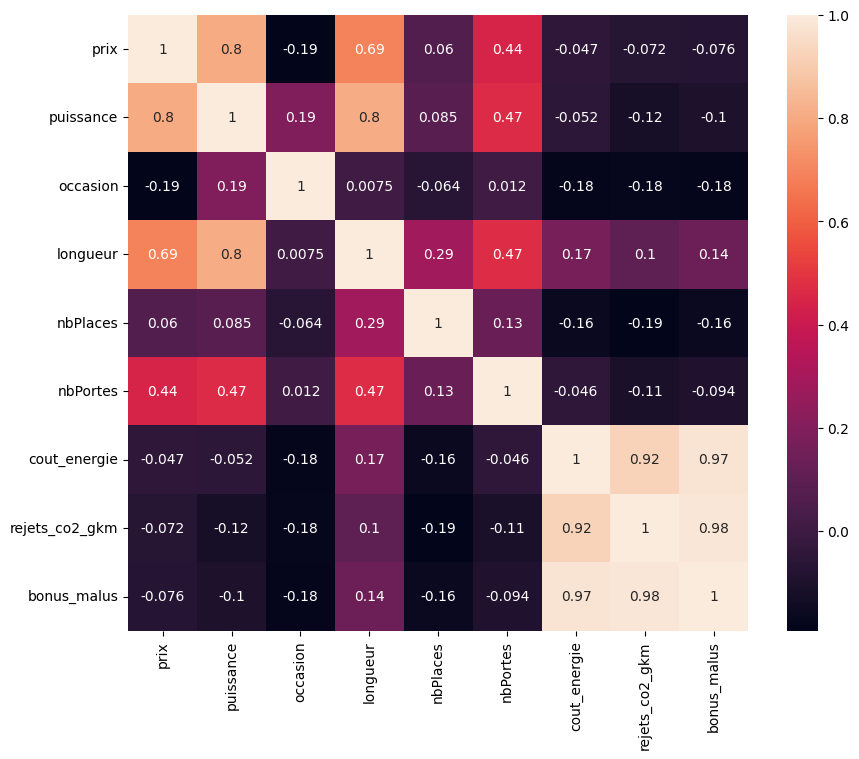

In [68]:
d = d[["prix","puissance","occasion","longueur","nbPlaces","nbPortes","cout_energie","rejets_co2_gkm","bonus_malus"]]
plt.figure(figsize=(10,8))
sns.heatmap(d.corr(),annot=True)

In [393]:
longueur_encoded = catalogue2.longueur.map({
    "courte":1,
    "moyenne":2,
    "longue":3,
    "très longue":4,
})

In [451]:
d = catalogue2.copy()
d["longueur"] = longueur_encoded
d["longueur"] = d.longueur.astype(int)
d = d[["log_prix","log_puissance","occasion","longueur","nbPlaces","nbPortes"]]

<Axes: >

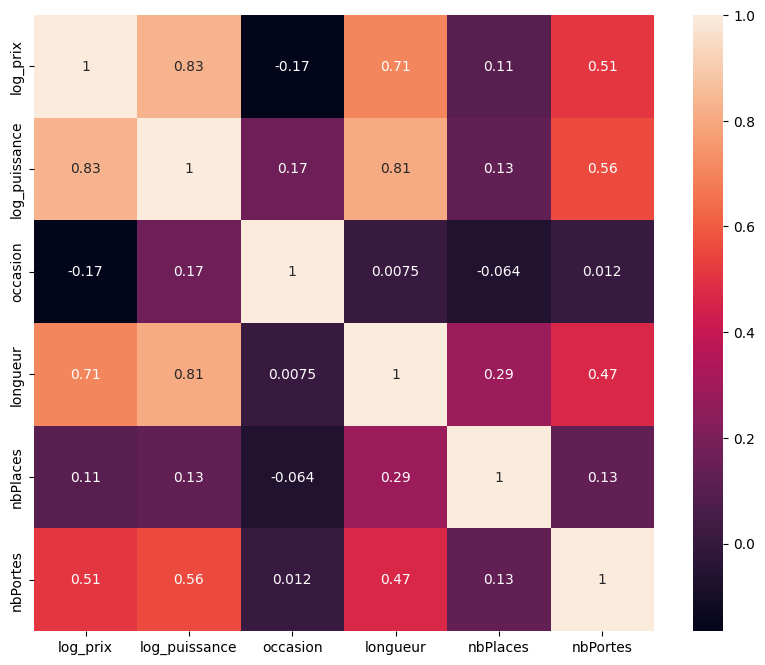

In [452]:
plt.figure(figsize=(10,8))
sns.heatmap(d.corr(),annot=True)

### Conclusion

- Le trio longueur, puissance et prix permet de caractériseer en 5 classes d'après nos analyses :
    - Voitures économiques : véhicules courts, faible puissance et coût inférieur à 20 000
    - Voitures abordables : véhicules courts, faible puissance et coût entre 20 000 et 30 000
    - Voitures familiales : véhicules moyens ou longs, puissance moyenne et coût entre 20 000 et 35 000
    - Voitures haut de gamme : véhicules longs, puissance élevée et coût entre 35 000 et 50 000
    - Voitures de luxe : véhicules très longs, très puissants et coût supérieur à 50 000
- Les variables puissances et prix sont fortement corrélés et leur transformation avec log renforce le corrélation
- La variable puissance entretien des relations beaucoup plus intéressantes avec les autres variables contrairement au prix
- nbPortes est plus corrélée à la variable prix/puissance que nbPlaces par contre la variables nbPlaces permet de créer de la nuance dans la spatialité des véhicules
- L'occasion permet de nuancer sur la puissance d'un véhicule. En effet, les véhicules d'occasion sont en majorité plus puissant que les véhicules neuf.
- Les variables d'émission ont tendance à créer de du bruit des la corrélation entre les variables

Au vue des dernières observations on retient les variables ci-dessous pour l'entrainement du modèle :
- prix
- puissance (log)
- longueur (log)
- nbPortes (Pas)
- nbPlaces
- occasion

Les autres servent à identifier ou caractériser l'apparence d'un vecteur.

Il faudra soit utiliser prix soit utiliser la puissance. Opte plus pour la puissance mais on observera un nuage de point avant de se définir les variables à retenir